In [4]:
import sys
sys.path.append('/home/james/Documents/VS/EmbedSegScrolls')
from EmbedSeg.utils.create_dicts import create_test_configs_dict
from EmbedSeg.test import begin_evaluating
from glob import glob
import tifffile
import matplotlib.pyplot as plt
from EmbedSeg.utils.visualize import visualize_3d
import os
from matplotlib.colors import ListedColormap
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import json
import tifffile
import numpy as np
import torch

### Specify the path to the evaluation images

In [5]:
data_dir = '../../../data'
project_name = 'Mouse-Organoid-Cells-CBG'
print("Evaluation images shall be read from: {}".format(os.path.join(data_dir, project_name)))

Evaluation images shall be read from: ../../../data/Mouse-Organoid-Cells-CBG


### Specify evaluation parameters 

Some hints:
* `tta`: Setting this to True (default) would enable **test-time augmentation**
* `ap_val`: This parameter ("average precision value") comes into action if ground truth segmentations exist for evaluation images, and allows to compare how good our predictions are versus the available ground truth segmentations.
* `checkpoint_path`: This parameter provides the path to the trained model weights which you would like to use for evaluation. 
* `save_dir`: This parameter specifies the path to the prediction instances. Equal to `inference` by default.
In the cell after this one, a `test_configs` dictionary is generated from the parameters specified here!
<a id='checkpoint'></a>

In [6]:
# uncomment for the model trained by you
# checkpoint_path = os.path.join('experiment', project_name+'-'+'demo', 'best_iou_model.pth')
# if os.path.isfile('data_properties.json'): 
#     with open(os.path.join('data_properties.json')) as json_file:
#         data = json.load(json_file)
#         one_hot = data['one_hot']
#         data_type = data['data_type']
#         min_object_size = int(data['min_object_size'])
#         foreground_weight = float(data['foreground_weight'])
#         n_z, n_y, n_x = int(data['n_z']),int(data['n_y']), int(data['n_x'])
#         pixel_size_z_microns, pixel_size_y_microns, pixel_size_x_microns = float(data['pixel_size_z_microns']), float(data['pixel_size_y_microns']), float(data['pixel_size_x_microns']) 
#         mask_start_x, mask_start_y, mask_start_z = int(data['mask_start_x']), int(data['mask_start_y']), int(data['mask_start_z'])  
#         mask_end_x, mask_end_y, mask_end_z = int(data['mask_end_x']), int(data['mask_end_y']), int(data['mask_end_z']) 
# if os.path.isfile('normalization.json'): 
#     with open(os.path.join('normalization.json')) as json_file:
#         data = json.load(json_file)
#         norm = data['norm']



# use the following for the pretrained model weights
torch.hub.download_url_to_file(url = 'https://owncloud.mpi-cbg.de/index.php/s/sQqIVNKdJ8Q64eZ/download', 
                               dst = 'pretrained_model', progress=True)
import zipfile
with zipfile.ZipFile('pretrained_model', 'r') as zip_ref:
    zip_ref.extractall('')
checkpoint_path = os.path.join(project_name+'-'+'demo', 'best_iou_model.pth')
if os.path.isfile(os.path.join(project_name+'-'+'demo','data_properties.json')): 
    with open(os.path.join(project_name+'-'+'demo', 'data_properties.json')) as json_file:
        data = json.load(json_file)
        data_type = data['data_type']
        min_object_size = int(data['min_object_size']) 
        n_z, n_y, n_x = int(data['n_z']), int(data['n_y']), int(data['n_x'])
        pixel_size_z_microns, pixel_size_y_microns, pixel_size_x_microns = float(data['pixel_size_z_microns']), float(data['pixel_size_y_microns']), float(data['pixel_size_x_microns']) 
        mask_start_x, mask_start_y, mask_start_z = int(data['mask_start_x']), int(data['mask_start_y']), int(data['mask_start_z'])  
        mask_end_x, mask_end_y, mask_end_z = int(data['mask_end_x']), int(data['mask_end_y']), int(data['mask_end_z']) 

if os.path.isfile(os.path.join(project_name+'-'+'demo','normalization.json')): 
    with open(os.path.join(project_name+'-'+'demo', 'normalization.json')) as json_file:
        data = json.load(json_file)
        norm = data['norm']

42.5MB [00:02, 15.0MB/s]


ℹ️ Setting `tta=True` would give better results but would take longer to compute!

In [7]:
tta = True
ap_val = 0.5
save_dir = './inference'

In [8]:
if os.path.exists(checkpoint_path):
    print("Trained model weights found at : {}".format(checkpoint_path))
else:
    print("Trained model weights were not found at the specified location!")

Trained model weights found at : Mouse-Organoid-Cells-CBG-demo/best_iou_model.pth


### Create `test_configs` dictionary from the above-specified parameters

In [9]:
test_configs = create_test_configs_dict(data_dir = os.path.join(data_dir, project_name),
                                        checkpoint_path = checkpoint_path,
                                        tta = tta, 
                                        ap_val = ap_val,
                                        min_object_size = min_object_size, 
                                        save_dir = save_dir,
                                        norm = norm, 
                                        data_type = data_type,
                                        n_z = n_z,
                                        n_y = n_y,
                                        n_x = n_x,
                                        anisotropy_factor = pixel_size_z_microns/pixel_size_x_microns,
                                        name = '3d',
                                        )

`test_configs` dictionary successfully created with: 
 -- evaluation images accessed from ../../../data/Mouse-Organoid-Cells-CBG, 
 -- trained weights accessed from Mouse-Organoid-Cells-CBG-demo/best_iou_model.pth, 
 -- output directory chosen as ./inference


### Begin Evaluating

The higher the Average Precision ($AP_{dsb}$) score is, the better the network has learnt to perform instance segmentation on these unseen images.

In [10]:
begin_evaluating(test_configs, mask_region = [[mask_start_z, mask_start_y, mask_start_x], [mask_end_z, mask_end_y, mask_end_x]])

3-D `test` dataloader created! Accessing data from ../../../data/Mouse-Organoid-Cells-CBG/test/
Number of images in `test` directory is 10
Number of instances in `test` directory is 10
Number of center images in `test` directory is 0
*************************
Creating Branched Erfnet 3D with [6, 1] outputs


RuntimeError: Error(s) in loading state_dict for BranchedERFNet_3d:
	Missing key(s) in state_dict: "encoder.initial_block.conv.weight", "encoder.initial_block.conv.bias", "encoder.initial_block.bn.weight", "encoder.initial_block.bn.bias", "encoder.initial_block.bn.running_mean", "encoder.initial_block.bn.running_var", "encoder.layers.0.conv.weight", "encoder.layers.0.conv.bias", "encoder.layers.0.bn.weight", "encoder.layers.0.bn.bias", "encoder.layers.0.bn.running_mean", "encoder.layers.0.bn.running_var", "encoder.layers.1.conv3x1x1_1.weight", "encoder.layers.1.conv3x1x1_1.bias", "encoder.layers.1.conv1x3x1_1.weight", "encoder.layers.1.conv1x3x1_1.bias", "encoder.layers.1.conv1x1x3_1.weight", "encoder.layers.1.conv1x1x3_1.bias", "encoder.layers.1.bn1.weight", "encoder.layers.1.bn1.bias", "encoder.layers.1.bn1.running_mean", "encoder.layers.1.bn1.running_var", "encoder.layers.1.conv3x1x1_2.weight", "encoder.layers.1.conv3x1x1_2.bias", "encoder.layers.1.conv1x3x1_2.weight", "encoder.layers.1.conv1x3x1_2.bias", "encoder.layers.1.conv1x1x3_2.weight", "encoder.layers.1.conv1x1x3_2.bias", "encoder.layers.1.bn2.weight", "encoder.layers.1.bn2.bias", "encoder.layers.1.bn2.running_mean", "encoder.layers.1.bn2.running_var", "encoder.layers.2.conv3x1x1_1.weight", "encoder.layers.2.conv3x1x1_1.bias", "encoder.layers.2.conv1x3x1_1.weight", "encoder.layers.2.conv1x3x1_1.bias", "encoder.layers.2.conv1x1x3_1.weight", "encoder.layers.2.conv1x1x3_1.bias", "encoder.layers.2.bn1.weight", "encoder.layers.2.bn1.bias", "encoder.layers.2.bn1.running_mean", "encoder.layers.2.bn1.running_var", "encoder.layers.2.conv3x1x1_2.weight", "encoder.layers.2.conv3x1x1_2.bias", "encoder.layers.2.conv1x3x1_2.weight", "encoder.layers.2.conv1x3x1_2.bias", "encoder.layers.2.conv1x1x3_2.weight", "encoder.layers.2.conv1x1x3_2.bias", "encoder.layers.2.bn2.weight", "encoder.layers.2.bn2.bias", "encoder.layers.2.bn2.running_mean", "encoder.layers.2.bn2.running_var", "encoder.layers.3.conv3x1x1_1.weight", "encoder.layers.3.conv3x1x1_1.bias", "encoder.layers.3.conv1x3x1_1.weight", "encoder.layers.3.conv1x3x1_1.bias", "encoder.layers.3.conv1x1x3_1.weight", "encoder.layers.3.conv1x1x3_1.bias", "encoder.layers.3.bn1.weight", "encoder.layers.3.bn1.bias", "encoder.layers.3.bn1.running_mean", "encoder.layers.3.bn1.running_var", "encoder.layers.3.conv3x1x1_2.weight", "encoder.layers.3.conv3x1x1_2.bias", "encoder.layers.3.conv1x3x1_2.weight", "encoder.layers.3.conv1x3x1_2.bias", "encoder.layers.3.conv1x1x3_2.weight", "encoder.layers.3.conv1x1x3_2.bias", "encoder.layers.3.bn2.weight", "encoder.layers.3.bn2.bias", "encoder.layers.3.bn2.running_mean", "encoder.layers.3.bn2.running_var", "encoder.layers.4.conv3x1x1_1.weight", "encoder.layers.4.conv3x1x1_1.bias", "encoder.layers.4.conv1x3x1_1.weight", "encoder.layers.4.conv1x3x1_1.bias", "encoder.layers.4.conv1x1x3_1.weight", "encoder.layers.4.conv1x1x3_1.bias", "encoder.layers.4.bn1.weight", "encoder.layers.4.bn1.bias", "encoder.layers.4.bn1.running_mean", "encoder.layers.4.bn1.running_var", "encoder.layers.4.conv3x1x1_2.weight", "encoder.layers.4.conv3x1x1_2.bias", "encoder.layers.4.conv1x3x1_2.weight", "encoder.layers.4.conv1x3x1_2.bias", "encoder.layers.4.conv1x1x3_2.weight", "encoder.layers.4.conv1x1x3_2.bias", "encoder.layers.4.bn2.weight", "encoder.layers.4.bn2.bias", "encoder.layers.4.bn2.running_mean", "encoder.layers.4.bn2.running_var", "encoder.layers.5.conv3x1x1_1.weight", "encoder.layers.5.conv3x1x1_1.bias", "encoder.layers.5.conv1x3x1_1.weight", "encoder.layers.5.conv1x3x1_1.bias", "encoder.layers.5.conv1x1x3_1.weight", "encoder.layers.5.conv1x1x3_1.bias", "encoder.layers.5.bn1.weight", "encoder.layers.5.bn1.bias", "encoder.layers.5.bn1.running_mean", "encoder.layers.5.bn1.running_var", "encoder.layers.5.conv3x1x1_2.weight", "encoder.layers.5.conv3x1x1_2.bias", "encoder.layers.5.conv1x3x1_2.weight", "encoder.layers.5.conv1x3x1_2.bias", "encoder.layers.5.conv1x1x3_2.weight", "encoder.layers.5.conv1x1x3_2.bias", "encoder.layers.5.bn2.weight", "encoder.layers.5.bn2.bias", "encoder.layers.5.bn2.running_mean", "encoder.layers.5.bn2.running_var", "encoder.layers.6.conv.weight", "encoder.layers.6.conv.bias", "encoder.layers.6.bn.weight", "encoder.layers.6.bn.bias", "encoder.layers.6.bn.running_mean", "encoder.layers.6.bn.running_var", "encoder.layers.7.conv3x1x1_1.weight", "encoder.layers.7.conv3x1x1_1.bias", "encoder.layers.7.conv1x3x1_1.weight", "encoder.layers.7.conv1x3x1_1.bias", "encoder.layers.7.conv1x1x3_1.weight", "encoder.layers.7.conv1x1x3_1.bias", "encoder.layers.7.bn1.weight", "encoder.layers.7.bn1.bias", "encoder.layers.7.bn1.running_mean", "encoder.layers.7.bn1.running_var", "encoder.layers.7.conv3x1x1_2.weight", "encoder.layers.7.conv3x1x1_2.bias", "encoder.layers.7.conv1x3x1_2.weight", "encoder.layers.7.conv1x3x1_2.bias", "encoder.layers.7.conv1x1x3_2.weight", "encoder.layers.7.conv1x1x3_2.bias", "encoder.layers.7.bn2.weight", "encoder.layers.7.bn2.bias", "encoder.layers.7.bn2.running_mean", "encoder.layers.7.bn2.running_var", "encoder.layers.8.conv3x1x1_1.weight", "encoder.layers.8.conv3x1x1_1.bias", "encoder.layers.8.conv1x3x1_1.weight", "encoder.layers.8.conv1x3x1_1.bias", "encoder.layers.8.conv1x1x3_1.weight", "encoder.layers.8.conv1x1x3_1.bias", "encoder.layers.8.bn1.weight", "encoder.layers.8.bn1.bias", "encoder.layers.8.bn1.running_mean", "encoder.layers.8.bn1.running_var", "encoder.layers.8.conv3x1x1_2.weight", "encoder.layers.8.conv3x1x1_2.bias", "encoder.layers.8.conv1x3x1_2.weight", "encoder.layers.8.conv1x3x1_2.bias", "encoder.layers.8.conv1x1x3_2.weight", "encoder.layers.8.conv1x1x3_2.bias", "encoder.layers.8.bn2.weight", "encoder.layers.8.bn2.bias", "encoder.layers.8.bn2.running_mean", "encoder.layers.8.bn2.running_var", "encoder.layers.9.conv3x1x1_1.weight", "encoder.layers.9.conv3x1x1_1.bias", "encoder.layers.9.conv1x3x1_1.weight", "encoder.layers.9.conv1x3x1_1.bias", "encoder.layers.9.conv1x1x3_1.weight", "encoder.layers.9.conv1x1x3_1.bias", "encoder.layers.9.bn1.weight", "encoder.layers.9.bn1.bias", "encoder.layers.9.bn1.running_mean", "encoder.layers.9.bn1.running_var", "encoder.layers.9.conv3x1x1_2.weight", "encoder.layers.9.conv3x1x1_2.bias", "encoder.layers.9.conv1x3x1_2.weight", "encoder.layers.9.conv1x3x1_2.bias", "encoder.layers.9.conv1x1x3_2.weight", "encoder.layers.9.conv1x1x3_2.bias", "encoder.layers.9.bn2.weight", "encoder.layers.9.bn2.bias", "encoder.layers.9.bn2.running_mean", "encoder.layers.9.bn2.running_var", "encoder.layers.10.conv3x1x1_1.weight", "encoder.layers.10.conv3x1x1_1.bias", "encoder.layers.10.conv1x3x1_1.weight", "encoder.layers.10.conv1x3x1_1.bias", "encoder.layers.10.conv1x1x3_1.weight", "encoder.layers.10.conv1x1x3_1.bias", "encoder.layers.10.bn1.weight", "encoder.layers.10.bn1.bias", "encoder.layers.10.bn1.running_mean", "encoder.layers.10.bn1.running_var", "encoder.layers.10.conv3x1x1_2.weight", "encoder.layers.10.conv3x1x1_2.bias", "encoder.layers.10.conv1x3x1_2.weight", "encoder.layers.10.conv1x3x1_2.bias", "encoder.layers.10.conv1x1x3_2.weight", "encoder.layers.10.conv1x1x3_2.bias", "encoder.layers.10.bn2.weight", "encoder.layers.10.bn2.bias", "encoder.layers.10.bn2.running_mean", "encoder.layers.10.bn2.running_var", "encoder.layers.11.conv3x1x1_1.weight", "encoder.layers.11.conv3x1x1_1.bias", "encoder.layers.11.conv1x3x1_1.weight", "encoder.layers.11.conv1x3x1_1.bias", "encoder.layers.11.conv1x1x3_1.weight", "encoder.layers.11.conv1x1x3_1.bias", "encoder.layers.11.bn1.weight", "encoder.layers.11.bn1.bias", "encoder.layers.11.bn1.running_mean", "encoder.layers.11.bn1.running_var", "encoder.layers.11.conv3x1x1_2.weight", "encoder.layers.11.conv3x1x1_2.bias", "encoder.layers.11.conv1x3x1_2.weight", "encoder.layers.11.conv1x3x1_2.bias", "encoder.layers.11.conv1x1x3_2.weight", "encoder.layers.11.conv1x1x3_2.bias", "encoder.layers.11.bn2.weight", "encoder.layers.11.bn2.bias", "encoder.layers.11.bn2.running_mean", "encoder.layers.11.bn2.running_var", "encoder.layers.12.conv3x1x1_1.weight", "encoder.layers.12.conv3x1x1_1.bias", "encoder.layers.12.conv1x3x1_1.weight", "encoder.layers.12.conv1x3x1_1.bias", "encoder.layers.12.conv1x1x3_1.weight", "encoder.layers.12.conv1x1x3_1.bias", "encoder.layers.12.bn1.weight", "encoder.layers.12.bn1.bias", "encoder.layers.12.bn1.running_mean", "encoder.layers.12.bn1.running_var", "encoder.layers.12.conv3x1x1_2.weight", "encoder.layers.12.conv3x1x1_2.bias", "encoder.layers.12.conv1x3x1_2.weight", "encoder.layers.12.conv1x3x1_2.bias", "encoder.layers.12.conv1x1x3_2.weight", "encoder.layers.12.conv1x1x3_2.bias", "encoder.layers.12.bn2.weight", "encoder.layers.12.bn2.bias", "encoder.layers.12.bn2.running_mean", "encoder.layers.12.bn2.running_var", "encoder.layers.13.conv3x1x1_1.weight", "encoder.layers.13.conv3x1x1_1.bias", "encoder.layers.13.conv1x3x1_1.weight", "encoder.layers.13.conv1x3x1_1.bias", "encoder.layers.13.conv1x1x3_1.weight", "encoder.layers.13.conv1x1x3_1.bias", "encoder.layers.13.bn1.weight", "encoder.layers.13.bn1.bias", "encoder.layers.13.bn1.running_mean", "encoder.layers.13.bn1.running_var", "encoder.layers.13.conv3x1x1_2.weight", "encoder.layers.13.conv3x1x1_2.bias", "encoder.layers.13.conv1x3x1_2.weight", "encoder.layers.13.conv1x3x1_2.bias", "encoder.layers.13.conv1x1x3_2.weight", "encoder.layers.13.conv1x1x3_2.bias", "encoder.layers.13.bn2.weight", "encoder.layers.13.bn2.bias", "encoder.layers.13.bn2.running_mean", "encoder.layers.13.bn2.running_var", "encoder.layers.14.conv3x1x1_1.weight", "encoder.layers.14.conv3x1x1_1.bias", "encoder.layers.14.conv1x3x1_1.weight", "encoder.layers.14.conv1x3x1_1.bias", "encoder.layers.14.conv1x1x3_1.weight", "encoder.layers.14.conv1x1x3_1.bias", "encoder.layers.14.bn1.weight", "encoder.layers.14.bn1.bias", "encoder.layers.14.bn1.running_mean", "encoder.layers.14.bn1.running_var", "encoder.layers.14.conv3x1x1_2.weight", "encoder.layers.14.conv3x1x1_2.bias", "encoder.layers.14.conv1x3x1_2.weight", "encoder.layers.14.conv1x3x1_2.bias", "encoder.layers.14.conv1x1x3_2.weight", "encoder.layers.14.conv1x1x3_2.bias", "encoder.layers.14.bn2.weight", "encoder.layers.14.bn2.bias", "encoder.layers.14.bn2.running_mean", "encoder.layers.14.bn2.running_var", "encoder.output_conv.weight", "encoder.output_conv.bias", "decoders.0.layers.0.conv.weight", "decoders.0.layers.0.conv.bias", "decoders.0.layers.0.bn.weight", "decoders.0.layers.0.bn.bias", "decoders.0.layers.0.bn.running_mean", "decoders.0.layers.0.bn.running_var", "decoders.0.layers.1.conv3x1x1_1.weight", "decoders.0.layers.1.conv3x1x1_1.bias", "decoders.0.layers.1.conv1x3x1_1.weight", "decoders.0.layers.1.conv1x3x1_1.bias", "decoders.0.layers.1.conv1x1x3_1.weight", "decoders.0.layers.1.conv1x1x3_1.bias", "decoders.0.layers.1.bn1.weight", "decoders.0.layers.1.bn1.bias", "decoders.0.layers.1.bn1.running_mean", "decoders.0.layers.1.bn1.running_var", "decoders.0.layers.1.conv3x1x1_2.weight", "decoders.0.layers.1.conv3x1x1_2.bias", "decoders.0.layers.1.conv1x3x1_2.weight", "decoders.0.layers.1.conv1x3x1_2.bias", "decoders.0.layers.1.conv1x1x3_2.weight", "decoders.0.layers.1.conv1x1x3_2.bias", "decoders.0.layers.1.bn2.weight", "decoders.0.layers.1.bn2.bias", "decoders.0.layers.1.bn2.running_mean", "decoders.0.layers.1.bn2.running_var", "decoders.0.layers.2.conv3x1x1_1.weight", "decoders.0.layers.2.conv3x1x1_1.bias", "decoders.0.layers.2.conv1x3x1_1.weight", "decoders.0.layers.2.conv1x3x1_1.bias", "decoders.0.layers.2.conv1x1x3_1.weight", "decoders.0.layers.2.conv1x1x3_1.bias", "decoders.0.layers.2.bn1.weight", "decoders.0.layers.2.bn1.bias", "decoders.0.layers.2.bn1.running_mean", "decoders.0.layers.2.bn1.running_var", "decoders.0.layers.2.conv3x1x1_2.weight", "decoders.0.layers.2.conv3x1x1_2.bias", "decoders.0.layers.2.conv1x3x1_2.weight", "decoders.0.layers.2.conv1x3x1_2.bias", "decoders.0.layers.2.conv1x1x3_2.weight", "decoders.0.layers.2.conv1x1x3_2.bias", "decoders.0.layers.2.bn2.weight", "decoders.0.layers.2.bn2.bias", "decoders.0.layers.2.bn2.running_mean", "decoders.0.layers.2.bn2.running_var", "decoders.0.layers.3.conv.weight", "decoders.0.layers.3.conv.bias", "decoders.0.layers.3.bn.weight", "decoders.0.layers.3.bn.bias", "decoders.0.layers.3.bn.running_mean", "decoders.0.layers.3.bn.running_var", "decoders.0.layers.4.conv3x1x1_1.weight", "decoders.0.layers.4.conv3x1x1_1.bias", "decoders.0.layers.4.conv1x3x1_1.weight", "decoders.0.layers.4.conv1x3x1_1.bias", "decoders.0.layers.4.conv1x1x3_1.weight", "decoders.0.layers.4.conv1x1x3_1.bias", "decoders.0.layers.4.bn1.weight", "decoders.0.layers.4.bn1.bias", "decoders.0.layers.4.bn1.running_mean", "decoders.0.layers.4.bn1.running_var", "decoders.0.layers.4.conv3x1x1_2.weight", "decoders.0.layers.4.conv3x1x1_2.bias", "decoders.0.layers.4.conv1x3x1_2.weight", "decoders.0.layers.4.conv1x3x1_2.bias", "decoders.0.layers.4.conv1x1x3_2.weight", "decoders.0.layers.4.conv1x1x3_2.bias", "decoders.0.layers.4.bn2.weight", "decoders.0.layers.4.bn2.bias", "decoders.0.layers.4.bn2.running_mean", "decoders.0.layers.4.bn2.running_var", "decoders.0.layers.5.conv3x1x1_1.weight", "decoders.0.layers.5.conv3x1x1_1.bias", "decoders.0.layers.5.conv1x3x1_1.weight", "decoders.0.layers.5.conv1x3x1_1.bias", "decoders.0.layers.5.conv1x1x3_1.weight", "decoders.0.layers.5.conv1x1x3_1.bias", "decoders.0.layers.5.bn1.weight", "decoders.0.layers.5.bn1.bias", "decoders.0.layers.5.bn1.running_mean", "decoders.0.layers.5.bn1.running_var", "decoders.0.layers.5.conv3x1x1_2.weight", "decoders.0.layers.5.conv3x1x1_2.bias", "decoders.0.layers.5.conv1x3x1_2.weight", "decoders.0.layers.5.conv1x3x1_2.bias", "decoders.0.layers.5.conv1x1x3_2.weight", "decoders.0.layers.5.conv1x1x3_2.bias", "decoders.0.layers.5.bn2.weight", "decoders.0.layers.5.bn2.bias", "decoders.0.layers.5.bn2.running_mean", "decoders.0.layers.5.bn2.running_var", "decoders.0.output_conv.weight", "decoders.0.output_conv.bias", "decoders.1.layers.0.conv.weight", "decoders.1.layers.0.conv.bias", "decoders.1.layers.0.bn.weight", "decoders.1.layers.0.bn.bias", "decoders.1.layers.0.bn.running_mean", "decoders.1.layers.0.bn.running_var", "decoders.1.layers.1.conv3x1x1_1.weight", "decoders.1.layers.1.conv3x1x1_1.bias", "decoders.1.layers.1.conv1x3x1_1.weight", "decoders.1.layers.1.conv1x3x1_1.bias", "decoders.1.layers.1.conv1x1x3_1.weight", "decoders.1.layers.1.conv1x1x3_1.bias", "decoders.1.layers.1.bn1.weight", "decoders.1.layers.1.bn1.bias", "decoders.1.layers.1.bn1.running_mean", "decoders.1.layers.1.bn1.running_var", "decoders.1.layers.1.conv3x1x1_2.weight", "decoders.1.layers.1.conv3x1x1_2.bias", "decoders.1.layers.1.conv1x3x1_2.weight", "decoders.1.layers.1.conv1x3x1_2.bias", "decoders.1.layers.1.conv1x1x3_2.weight", "decoders.1.layers.1.conv1x1x3_2.bias", "decoders.1.layers.1.bn2.weight", "decoders.1.layers.1.bn2.bias", "decoders.1.layers.1.bn2.running_mean", "decoders.1.layers.1.bn2.running_var", "decoders.1.layers.2.conv3x1x1_1.weight", "decoders.1.layers.2.conv3x1x1_1.bias", "decoders.1.layers.2.conv1x3x1_1.weight", "decoders.1.layers.2.conv1x3x1_1.bias", "decoders.1.layers.2.conv1x1x3_1.weight", "decoders.1.layers.2.conv1x1x3_1.bias", "decoders.1.layers.2.bn1.weight", "decoders.1.layers.2.bn1.bias", "decoders.1.layers.2.bn1.running_mean", "decoders.1.layers.2.bn1.running_var", "decoders.1.layers.2.conv3x1x1_2.weight", "decoders.1.layers.2.conv3x1x1_2.bias", "decoders.1.layers.2.conv1x3x1_2.weight", "decoders.1.layers.2.conv1x3x1_2.bias", "decoders.1.layers.2.conv1x1x3_2.weight", "decoders.1.layers.2.conv1x1x3_2.bias", "decoders.1.layers.2.bn2.weight", "decoders.1.layers.2.bn2.bias", "decoders.1.layers.2.bn2.running_mean", "decoders.1.layers.2.bn2.running_var", "decoders.1.layers.3.conv.weight", "decoders.1.layers.3.conv.bias", "decoders.1.layers.3.bn.weight", "decoders.1.layers.3.bn.bias", "decoders.1.layers.3.bn.running_mean", "decoders.1.layers.3.bn.running_var", "decoders.1.layers.4.conv3x1x1_1.weight", "decoders.1.layers.4.conv3x1x1_1.bias", "decoders.1.layers.4.conv1x3x1_1.weight", "decoders.1.layers.4.conv1x3x1_1.bias", "decoders.1.layers.4.conv1x1x3_1.weight", "decoders.1.layers.4.conv1x1x3_1.bias", "decoders.1.layers.4.bn1.weight", "decoders.1.layers.4.bn1.bias", "decoders.1.layers.4.bn1.running_mean", "decoders.1.layers.4.bn1.running_var", "decoders.1.layers.4.conv3x1x1_2.weight", "decoders.1.layers.4.conv3x1x1_2.bias", "decoders.1.layers.4.conv1x3x1_2.weight", "decoders.1.layers.4.conv1x3x1_2.bias", "decoders.1.layers.4.conv1x1x3_2.weight", "decoders.1.layers.4.conv1x1x3_2.bias", "decoders.1.layers.4.bn2.weight", "decoders.1.layers.4.bn2.bias", "decoders.1.layers.4.bn2.running_mean", "decoders.1.layers.4.bn2.running_var", "decoders.1.layers.5.conv3x1x1_1.weight", "decoders.1.layers.5.conv3x1x1_1.bias", "decoders.1.layers.5.conv1x3x1_1.weight", "decoders.1.layers.5.conv1x3x1_1.bias", "decoders.1.layers.5.conv1x1x3_1.weight", "decoders.1.layers.5.conv1x1x3_1.bias", "decoders.1.layers.5.bn1.weight", "decoders.1.layers.5.bn1.bias", "decoders.1.layers.5.bn1.running_mean", "decoders.1.layers.5.bn1.running_var", "decoders.1.layers.5.conv3x1x1_2.weight", "decoders.1.layers.5.conv3x1x1_2.bias", "decoders.1.layers.5.conv1x3x1_2.weight", "decoders.1.layers.5.conv1x3x1_2.bias", "decoders.1.layers.5.conv1x1x3_2.weight", "decoders.1.layers.5.conv1x1x3_2.bias", "decoders.1.layers.5.bn2.weight", "decoders.1.layers.5.bn2.bias", "decoders.1.layers.5.bn2.running_mean", "decoders.1.layers.5.bn2.running_var", "decoders.1.output_conv.weight", "decoders.1.output_conv.bias". 
	Unexpected key(s) in state_dict: "module.encoder.initial_block.conv.weight", "module.encoder.initial_block.conv.bias", "module.encoder.initial_block.bn.weight", "module.encoder.initial_block.bn.bias", "module.encoder.initial_block.bn.running_mean", "module.encoder.initial_block.bn.running_var", "module.encoder.initial_block.bn.num_batches_tracked", "module.encoder.layers.0.conv.weight", "module.encoder.layers.0.conv.bias", "module.encoder.layers.0.bn.weight", "module.encoder.layers.0.bn.bias", "module.encoder.layers.0.bn.running_mean", "module.encoder.layers.0.bn.running_var", "module.encoder.layers.0.bn.num_batches_tracked", "module.encoder.layers.1.conv3x1x1_1.weight", "module.encoder.layers.1.conv3x1x1_1.bias", "module.encoder.layers.1.conv1x3x1_1.weight", "module.encoder.layers.1.conv1x3x1_1.bias", "module.encoder.layers.1.conv1x1x3_1.weight", "module.encoder.layers.1.conv1x1x3_1.bias", "module.encoder.layers.1.bn1.weight", "module.encoder.layers.1.bn1.bias", "module.encoder.layers.1.bn1.running_mean", "module.encoder.layers.1.bn1.running_var", "module.encoder.layers.1.bn1.num_batches_tracked", "module.encoder.layers.1.conv3x1x1_2.weight", "module.encoder.layers.1.conv3x1x1_2.bias", "module.encoder.layers.1.conv1x3x1_2.weight", "module.encoder.layers.1.conv1x3x1_2.bias", "module.encoder.layers.1.conv1x1x3_2.weight", "module.encoder.layers.1.conv1x1x3_2.bias", "module.encoder.layers.1.bn2.weight", "module.encoder.layers.1.bn2.bias", "module.encoder.layers.1.bn2.running_mean", "module.encoder.layers.1.bn2.running_var", "module.encoder.layers.1.bn2.num_batches_tracked", "module.encoder.layers.2.conv3x1x1_1.weight", "module.encoder.layers.2.conv3x1x1_1.bias", "module.encoder.layers.2.conv1x3x1_1.weight", "module.encoder.layers.2.conv1x3x1_1.bias", "module.encoder.layers.2.conv1x1x3_1.weight", "module.encoder.layers.2.conv1x1x3_1.bias", "module.encoder.layers.2.bn1.weight", "module.encoder.layers.2.bn1.bias", "module.encoder.layers.2.bn1.running_mean", "module.encoder.layers.2.bn1.running_var", "module.encoder.layers.2.bn1.num_batches_tracked", "module.encoder.layers.2.conv3x1x1_2.weight", "module.encoder.layers.2.conv3x1x1_2.bias", "module.encoder.layers.2.conv1x3x1_2.weight", "module.encoder.layers.2.conv1x3x1_2.bias", "module.encoder.layers.2.conv1x1x3_2.weight", "module.encoder.layers.2.conv1x1x3_2.bias", "module.encoder.layers.2.bn2.weight", "module.encoder.layers.2.bn2.bias", "module.encoder.layers.2.bn2.running_mean", "module.encoder.layers.2.bn2.running_var", "module.encoder.layers.2.bn2.num_batches_tracked", "module.encoder.layers.3.conv3x1x1_1.weight", "module.encoder.layers.3.conv3x1x1_1.bias", "module.encoder.layers.3.conv1x3x1_1.weight", "module.encoder.layers.3.conv1x3x1_1.bias", "module.encoder.layers.3.conv1x1x3_1.weight", "module.encoder.layers.3.conv1x1x3_1.bias", "module.encoder.layers.3.bn1.weight", "module.encoder.layers.3.bn1.bias", "module.encoder.layers.3.bn1.running_mean", "module.encoder.layers.3.bn1.running_var", "module.encoder.layers.3.bn1.num_batches_tracked", "module.encoder.layers.3.conv3x1x1_2.weight", "module.encoder.layers.3.conv3x1x1_2.bias", "module.encoder.layers.3.conv1x3x1_2.weight", "module.encoder.layers.3.conv1x3x1_2.bias", "module.encoder.layers.3.conv1x1x3_2.weight", "module.encoder.layers.3.conv1x1x3_2.bias", "module.encoder.layers.3.bn2.weight", "module.encoder.layers.3.bn2.bias", "module.encoder.layers.3.bn2.running_mean", "module.encoder.layers.3.bn2.running_var", "module.encoder.layers.3.bn2.num_batches_tracked", "module.encoder.layers.4.conv3x1x1_1.weight", "module.encoder.layers.4.conv3x1x1_1.bias", "module.encoder.layers.4.conv1x3x1_1.weight", "module.encoder.layers.4.conv1x3x1_1.bias", "module.encoder.layers.4.conv1x1x3_1.weight", "module.encoder.layers.4.conv1x1x3_1.bias", "module.encoder.layers.4.bn1.weight", "module.encoder.layers.4.bn1.bias", "module.encoder.layers.4.bn1.running_mean", "module.encoder.layers.4.bn1.running_var", "module.encoder.layers.4.bn1.num_batches_tracked", "module.encoder.layers.4.conv3x1x1_2.weight", "module.encoder.layers.4.conv3x1x1_2.bias", "module.encoder.layers.4.conv1x3x1_2.weight", "module.encoder.layers.4.conv1x3x1_2.bias", "module.encoder.layers.4.conv1x1x3_2.weight", "module.encoder.layers.4.conv1x1x3_2.bias", "module.encoder.layers.4.bn2.weight", "module.encoder.layers.4.bn2.bias", "module.encoder.layers.4.bn2.running_mean", "module.encoder.layers.4.bn2.running_var", "module.encoder.layers.4.bn2.num_batches_tracked", "module.encoder.layers.5.conv3x1x1_1.weight", "module.encoder.layers.5.conv3x1x1_1.bias", "module.encoder.layers.5.conv1x3x1_1.weight", "module.encoder.layers.5.conv1x3x1_1.bias", "module.encoder.layers.5.conv1x1x3_1.weight", "module.encoder.layers.5.conv1x1x3_1.bias", "module.encoder.layers.5.bn1.weight", "module.encoder.layers.5.bn1.bias", "module.encoder.layers.5.bn1.running_mean", "module.encoder.layers.5.bn1.running_var", "module.encoder.layers.5.bn1.num_batches_tracked", "module.encoder.layers.5.conv3x1x1_2.weight", "module.encoder.layers.5.conv3x1x1_2.bias", "module.encoder.layers.5.conv1x3x1_2.weight", "module.encoder.layers.5.conv1x3x1_2.bias", "module.encoder.layers.5.conv1x1x3_2.weight", "module.encoder.layers.5.conv1x1x3_2.bias", "module.encoder.layers.5.bn2.weight", "module.encoder.layers.5.bn2.bias", "module.encoder.layers.5.bn2.running_mean", "module.encoder.layers.5.bn2.running_var", "module.encoder.layers.5.bn2.num_batches_tracked", "module.encoder.layers.6.conv.weight", "module.encoder.layers.6.conv.bias", "module.encoder.layers.6.bn.weight", "module.encoder.layers.6.bn.bias", "module.encoder.layers.6.bn.running_mean", "module.encoder.layers.6.bn.running_var", "module.encoder.layers.6.bn.num_batches_tracked", "module.encoder.layers.7.conv3x1x1_1.weight", "module.encoder.layers.7.conv3x1x1_1.bias", "module.encoder.layers.7.conv1x3x1_1.weight", "module.encoder.layers.7.conv1x3x1_1.bias", "module.encoder.layers.7.conv1x1x3_1.weight", "module.encoder.layers.7.conv1x1x3_1.bias", "module.encoder.layers.7.bn1.weight", "module.encoder.layers.7.bn1.bias", "module.encoder.layers.7.bn1.running_mean", "module.encoder.layers.7.bn1.running_var", "module.encoder.layers.7.bn1.num_batches_tracked", "module.encoder.layers.7.conv3x1x1_2.weight", "module.encoder.layers.7.conv3x1x1_2.bias", "module.encoder.layers.7.conv1x3x1_2.weight", "module.encoder.layers.7.conv1x3x1_2.bias", "module.encoder.layers.7.conv1x1x3_2.weight", "module.encoder.layers.7.conv1x1x3_2.bias", "module.encoder.layers.7.bn2.weight", "module.encoder.layers.7.bn2.bias", "module.encoder.layers.7.bn2.running_mean", "module.encoder.layers.7.bn2.running_var", "module.encoder.layers.7.bn2.num_batches_tracked", "module.encoder.layers.8.conv3x1x1_1.weight", "module.encoder.layers.8.conv3x1x1_1.bias", "module.encoder.layers.8.conv1x3x1_1.weight", "module.encoder.layers.8.conv1x3x1_1.bias", "module.encoder.layers.8.conv1x1x3_1.weight", "module.encoder.layers.8.conv1x1x3_1.bias", "module.encoder.layers.8.bn1.weight", "module.encoder.layers.8.bn1.bias", "module.encoder.layers.8.bn1.running_mean", "module.encoder.layers.8.bn1.running_var", "module.encoder.layers.8.bn1.num_batches_tracked", "module.encoder.layers.8.conv3x1x1_2.weight", "module.encoder.layers.8.conv3x1x1_2.bias", "module.encoder.layers.8.conv1x3x1_2.weight", "module.encoder.layers.8.conv1x3x1_2.bias", "module.encoder.layers.8.conv1x1x3_2.weight", "module.encoder.layers.8.conv1x1x3_2.bias", "module.encoder.layers.8.bn2.weight", "module.encoder.layers.8.bn2.bias", "module.encoder.layers.8.bn2.running_mean", "module.encoder.layers.8.bn2.running_var", "module.encoder.layers.8.bn2.num_batches_tracked", "module.encoder.layers.9.conv3x1x1_1.weight", "module.encoder.layers.9.conv3x1x1_1.bias", "module.encoder.layers.9.conv1x3x1_1.weight", "module.encoder.layers.9.conv1x3x1_1.bias", "module.encoder.layers.9.conv1x1x3_1.weight", "module.encoder.layers.9.conv1x1x3_1.bias", "module.encoder.layers.9.bn1.weight", "module.encoder.layers.9.bn1.bias", "module.encoder.layers.9.bn1.running_mean", "module.encoder.layers.9.bn1.running_var", "module.encoder.layers.9.bn1.num_batches_tracked", "module.encoder.layers.9.conv3x1x1_2.weight", "module.encoder.layers.9.conv3x1x1_2.bias", "module.encoder.layers.9.conv1x3x1_2.weight", "module.encoder.layers.9.conv1x3x1_2.bias", "module.encoder.layers.9.conv1x1x3_2.weight", "module.encoder.layers.9.conv1x1x3_2.bias", "module.encoder.layers.9.bn2.weight", "module.encoder.layers.9.bn2.bias", "module.encoder.layers.9.bn2.running_mean", "module.encoder.layers.9.bn2.running_var", "module.encoder.layers.9.bn2.num_batches_tracked", "module.encoder.layers.10.conv3x1x1_1.weight", "module.encoder.layers.10.conv3x1x1_1.bias", "module.encoder.layers.10.conv1x3x1_1.weight", "module.encoder.layers.10.conv1x3x1_1.bias", "module.encoder.layers.10.conv1x1x3_1.weight", "module.encoder.layers.10.conv1x1x3_1.bias", "module.encoder.layers.10.bn1.weight", "module.encoder.layers.10.bn1.bias", "module.encoder.layers.10.bn1.running_mean", "module.encoder.layers.10.bn1.running_var", "module.encoder.layers.10.bn1.num_batches_tracked", "module.encoder.layers.10.conv3x1x1_2.weight", "module.encoder.layers.10.conv3x1x1_2.bias", "module.encoder.layers.10.conv1x3x1_2.weight", "module.encoder.layers.10.conv1x3x1_2.bias", "module.encoder.layers.10.conv1x1x3_2.weight", "module.encoder.layers.10.conv1x1x3_2.bias", "module.encoder.layers.10.bn2.weight", "module.encoder.layers.10.bn2.bias", "module.encoder.layers.10.bn2.running_mean", "module.encoder.layers.10.bn2.running_var", "module.encoder.layers.10.bn2.num_batches_tracked", "module.encoder.layers.11.conv3x1x1_1.weight", "module.encoder.layers.11.conv3x1x1_1.bias", "module.encoder.layers.11.conv1x3x1_1.weight", "module.encoder.layers.11.conv1x3x1_1.bias", "module.encoder.layers.11.conv1x1x3_1.weight", "module.encoder.layers.11.conv1x1x3_1.bias", "module.encoder.layers.11.bn1.weight", "module.encoder.layers.11.bn1.bias", "module.encoder.layers.11.bn1.running_mean", "module.encoder.layers.11.bn1.running_var", "module.encoder.layers.11.bn1.num_batches_tracked", "module.encoder.layers.11.conv3x1x1_2.weight", "module.encoder.layers.11.conv3x1x1_2.bias", "module.encoder.layers.11.conv1x3x1_2.weight", "module.encoder.layers.11.conv1x3x1_2.bias", "module.encoder.layers.11.conv1x1x3_2.weight", "module.encoder.layers.11.conv1x1x3_2.bias", "module.encoder.layers.11.bn2.weight", "module.encoder.layers.11.bn2.bias", "module.encoder.layers.11.bn2.running_mean", "module.encoder.layers.11.bn2.running_var", "module.encoder.layers.11.bn2.num_batches_tracked", "module.encoder.layers.12.conv3x1x1_1.weight", "module.encoder.layers.12.conv3x1x1_1.bias", "module.encoder.layers.12.conv1x3x1_1.weight", "module.encoder.layers.12.conv1x3x1_1.bias", "module.encoder.layers.12.conv1x1x3_1.weight", "module.encoder.layers.12.conv1x1x3_1.bias", "module.encoder.layers.12.bn1.weight", "module.encoder.layers.12.bn1.bias", "module.encoder.layers.12.bn1.running_mean", "module.encoder.layers.12.bn1.running_var", "module.encoder.layers.12.bn1.num_batches_tracked", "module.encoder.layers.12.conv3x1x1_2.weight", "module.encoder.layers.12.conv3x1x1_2.bias", "module.encoder.layers.12.conv1x3x1_2.weight", "module.encoder.layers.12.conv1x3x1_2.bias", "module.encoder.layers.12.conv1x1x3_2.weight", "module.encoder.layers.12.conv1x1x3_2.bias", "module.encoder.layers.12.bn2.weight", "module.encoder.layers.12.bn2.bias", "module.encoder.layers.12.bn2.running_mean", "module.encoder.layers.12.bn2.running_var", "module.encoder.layers.12.bn2.num_batches_tracked", "module.encoder.layers.13.conv3x1x1_1.weight", "module.encoder.layers.13.conv3x1x1_1.bias", "module.encoder.layers.13.conv1x3x1_1.weight", "module.encoder.layers.13.conv1x3x1_1.bias", "module.encoder.layers.13.conv1x1x3_1.weight", "module.encoder.layers.13.conv1x1x3_1.bias", "module.encoder.layers.13.bn1.weight", "module.encoder.layers.13.bn1.bias", "module.encoder.layers.13.bn1.running_mean", "module.encoder.layers.13.bn1.running_var", "module.encoder.layers.13.bn1.num_batches_tracked", "module.encoder.layers.13.conv3x1x1_2.weight", "module.encoder.layers.13.conv3x1x1_2.bias", "module.encoder.layers.13.conv1x3x1_2.weight", "module.encoder.layers.13.conv1x3x1_2.bias", "module.encoder.layers.13.conv1x1x3_2.weight", "module.encoder.layers.13.conv1x1x3_2.bias", "module.encoder.layers.13.bn2.weight", "module.encoder.layers.13.bn2.bias", "module.encoder.layers.13.bn2.running_mean", "module.encoder.layers.13.bn2.running_var", "module.encoder.layers.13.bn2.num_batches_tracked", "module.encoder.layers.14.conv3x1x1_1.weight", "module.encoder.layers.14.conv3x1x1_1.bias", "module.encoder.layers.14.conv1x3x1_1.weight", "module.encoder.layers.14.conv1x3x1_1.bias", "module.encoder.layers.14.conv1x1x3_1.weight", "module.encoder.layers.14.conv1x1x3_1.bias", "module.encoder.layers.14.bn1.weight", "module.encoder.layers.14.bn1.bias", "module.encoder.layers.14.bn1.running_mean", "module.encoder.layers.14.bn1.running_var", "module.encoder.layers.14.bn1.num_batches_tracked", "module.encoder.layers.14.conv3x1x1_2.weight", "module.encoder.layers.14.conv3x1x1_2.bias", "module.encoder.layers.14.conv1x3x1_2.weight", "module.encoder.layers.14.conv1x3x1_2.bias", "module.encoder.layers.14.conv1x1x3_2.weight", "module.encoder.layers.14.conv1x1x3_2.bias", "module.encoder.layers.14.bn2.weight", "module.encoder.layers.14.bn2.bias", "module.encoder.layers.14.bn2.running_mean", "module.encoder.layers.14.bn2.running_var", "module.encoder.layers.14.bn2.num_batches_tracked", "module.encoder.output_conv.weight", "module.encoder.output_conv.bias", "module.decoders.0.layers.0.conv.weight", "module.decoders.0.layers.0.conv.bias", "module.decoders.0.layers.0.bn.weight", "module.decoders.0.layers.0.bn.bias", "module.decoders.0.layers.0.bn.running_mean", "module.decoders.0.layers.0.bn.running_var", "module.decoders.0.layers.0.bn.num_batches_tracked", "module.decoders.0.layers.1.conv3x1x1_1.weight", "module.decoders.0.layers.1.conv3x1x1_1.bias", "module.decoders.0.layers.1.conv1x3x1_1.weight", "module.decoders.0.layers.1.conv1x3x1_1.bias", "module.decoders.0.layers.1.conv1x1x3_1.weight", "module.decoders.0.layers.1.conv1x1x3_1.bias", "module.decoders.0.layers.1.bn1.weight", "module.decoders.0.layers.1.bn1.bias", "module.decoders.0.layers.1.bn1.running_mean", "module.decoders.0.layers.1.bn1.running_var", "module.decoders.0.layers.1.bn1.num_batches_tracked", "module.decoders.0.layers.1.conv3x1x1_2.weight", "module.decoders.0.layers.1.conv3x1x1_2.bias", "module.decoders.0.layers.1.conv1x3x1_2.weight", "module.decoders.0.layers.1.conv1x3x1_2.bias", "module.decoders.0.layers.1.conv1x1x3_2.weight", "module.decoders.0.layers.1.conv1x1x3_2.bias", "module.decoders.0.layers.1.bn2.weight", "module.decoders.0.layers.1.bn2.bias", "module.decoders.0.layers.1.bn2.running_mean", "module.decoders.0.layers.1.bn2.running_var", "module.decoders.0.layers.1.bn2.num_batches_tracked", "module.decoders.0.layers.2.conv3x1x1_1.weight", "module.decoders.0.layers.2.conv3x1x1_1.bias", "module.decoders.0.layers.2.conv1x3x1_1.weight", "module.decoders.0.layers.2.conv1x3x1_1.bias", "module.decoders.0.layers.2.conv1x1x3_1.weight", "module.decoders.0.layers.2.conv1x1x3_1.bias", "module.decoders.0.layers.2.bn1.weight", "module.decoders.0.layers.2.bn1.bias", "module.decoders.0.layers.2.bn1.running_mean", "module.decoders.0.layers.2.bn1.running_var", "module.decoders.0.layers.2.bn1.num_batches_tracked", "module.decoders.0.layers.2.conv3x1x1_2.weight", "module.decoders.0.layers.2.conv3x1x1_2.bias", "module.decoders.0.layers.2.conv1x3x1_2.weight", "module.decoders.0.layers.2.conv1x3x1_2.bias", "module.decoders.0.layers.2.conv1x1x3_2.weight", "module.decoders.0.layers.2.conv1x1x3_2.bias", "module.decoders.0.layers.2.bn2.weight", "module.decoders.0.layers.2.bn2.bias", "module.decoders.0.layers.2.bn2.running_mean", "module.decoders.0.layers.2.bn2.running_var", "module.decoders.0.layers.2.bn2.num_batches_tracked", "module.decoders.0.layers.3.conv.weight", "module.decoders.0.layers.3.conv.bias", "module.decoders.0.layers.3.bn.weight", "module.decoders.0.layers.3.bn.bias", "module.decoders.0.layers.3.bn.running_mean", "module.decoders.0.layers.3.bn.running_var", "module.decoders.0.layers.3.bn.num_batches_tracked", "module.decoders.0.layers.4.conv3x1x1_1.weight", "module.decoders.0.layers.4.conv3x1x1_1.bias", "module.decoders.0.layers.4.conv1x3x1_1.weight", "module.decoders.0.layers.4.conv1x3x1_1.bias", "module.decoders.0.layers.4.conv1x1x3_1.weight", "module.decoders.0.layers.4.conv1x1x3_1.bias", "module.decoders.0.layers.4.bn1.weight", "module.decoders.0.layers.4.bn1.bias", "module.decoders.0.layers.4.bn1.running_mean", "module.decoders.0.layers.4.bn1.running_var", "module.decoders.0.layers.4.bn1.num_batches_tracked", "module.decoders.0.layers.4.conv3x1x1_2.weight", "module.decoders.0.layers.4.conv3x1x1_2.bias", "module.decoders.0.layers.4.conv1x3x1_2.weight", "module.decoders.0.layers.4.conv1x3x1_2.bias", "module.decoders.0.layers.4.conv1x1x3_2.weight", "module.decoders.0.layers.4.conv1x1x3_2.bias", "module.decoders.0.layers.4.bn2.weight", "module.decoders.0.layers.4.bn2.bias", "module.decoders.0.layers.4.bn2.running_mean", "module.decoders.0.layers.4.bn2.running_var", "module.decoders.0.layers.4.bn2.num_batches_tracked", "module.decoders.0.layers.5.conv3x1x1_1.weight", "module.decoders.0.layers.5.conv3x1x1_1.bias", "module.decoders.0.layers.5.conv1x3x1_1.weight", "module.decoders.0.layers.5.conv1x3x1_1.bias", "module.decoders.0.layers.5.conv1x1x3_1.weight", "module.decoders.0.layers.5.conv1x1x3_1.bias", "module.decoders.0.layers.5.bn1.weight", "module.decoders.0.layers.5.bn1.bias", "module.decoders.0.layers.5.bn1.running_mean", "module.decoders.0.layers.5.bn1.running_var", "module.decoders.0.layers.5.bn1.num_batches_tracked", "module.decoders.0.layers.5.conv3x1x1_2.weight", "module.decoders.0.layers.5.conv3x1x1_2.bias", "module.decoders.0.layers.5.conv1x3x1_2.weight", "module.decoders.0.layers.5.conv1x3x1_2.bias", "module.decoders.0.layers.5.conv1x1x3_2.weight", "module.decoders.0.layers.5.conv1x1x3_2.bias", "module.decoders.0.layers.5.bn2.weight", "module.decoders.0.layers.5.bn2.bias", "module.decoders.0.layers.5.bn2.running_mean", "module.decoders.0.layers.5.bn2.running_var", "module.decoders.0.layers.5.bn2.num_batches_tracked", "module.decoders.0.output_conv.weight", "module.decoders.0.output_conv.bias", "module.decoders.1.layers.0.conv.weight", "module.decoders.1.layers.0.conv.bias", "module.decoders.1.layers.0.bn.weight", "module.decoders.1.layers.0.bn.bias", "module.decoders.1.layers.0.bn.running_mean", "module.decoders.1.layers.0.bn.running_var", "module.decoders.1.layers.0.bn.num_batches_tracked", "module.decoders.1.layers.1.conv3x1x1_1.weight", "module.decoders.1.layers.1.conv3x1x1_1.bias", "module.decoders.1.layers.1.conv1x3x1_1.weight", "module.decoders.1.layers.1.conv1x3x1_1.bias", "module.decoders.1.layers.1.conv1x1x3_1.weight", "module.decoders.1.layers.1.conv1x1x3_1.bias", "module.decoders.1.layers.1.bn1.weight", "module.decoders.1.layers.1.bn1.bias", "module.decoders.1.layers.1.bn1.running_mean", "module.decoders.1.layers.1.bn1.running_var", "module.decoders.1.layers.1.bn1.num_batches_tracked", "module.decoders.1.layers.1.conv3x1x1_2.weight", "module.decoders.1.layers.1.conv3x1x1_2.bias", "module.decoders.1.layers.1.conv1x3x1_2.weight", "module.decoders.1.layers.1.conv1x3x1_2.bias", "module.decoders.1.layers.1.conv1x1x3_2.weight", "module.decoders.1.layers.1.conv1x1x3_2.bias", "module.decoders.1.layers.1.bn2.weight", "module.decoders.1.layers.1.bn2.bias", "module.decoders.1.layers.1.bn2.running_mean", "module.decoders.1.layers.1.bn2.running_var", "module.decoders.1.layers.1.bn2.num_batches_tracked", "module.decoders.1.layers.2.conv3x1x1_1.weight", "module.decoders.1.layers.2.conv3x1x1_1.bias", "module.decoders.1.layers.2.conv1x3x1_1.weight", "module.decoders.1.layers.2.conv1x3x1_1.bias", "module.decoders.1.layers.2.conv1x1x3_1.weight", "module.decoders.1.layers.2.conv1x1x3_1.bias", "module.decoders.1.layers.2.bn1.weight", "module.decoders.1.layers.2.bn1.bias", "module.decoders.1.layers.2.bn1.running_mean", "module.decoders.1.layers.2.bn1.running_var", "module.decoders.1.layers.2.bn1.num_batches_tracked", "module.decoders.1.layers.2.conv3x1x1_2.weight", "module.decoders.1.layers.2.conv3x1x1_2.bias", "module.decoders.1.layers.2.conv1x3x1_2.weight", "module.decoders.1.layers.2.conv1x3x1_2.bias", "module.decoders.1.layers.2.conv1x1x3_2.weight", "module.decoders.1.layers.2.conv1x1x3_2.bias", "module.decoders.1.layers.2.bn2.weight", "module.decoders.1.layers.2.bn2.bias", "module.decoders.1.layers.2.bn2.running_mean", "module.decoders.1.layers.2.bn2.running_var", "module.decoders.1.layers.2.bn2.num_batches_tracked", "module.decoders.1.layers.3.conv.weight", "module.decoders.1.layers.3.conv.bias", "module.decoders.1.layers.3.bn.weight", "module.decoders.1.layers.3.bn.bias", "module.decoders.1.layers.3.bn.running_mean", "module.decoders.1.layers.3.bn.running_var", "module.decoders.1.layers.3.bn.num_batches_tracked", "module.decoders.1.layers.4.conv3x1x1_1.weight", "module.decoders.1.layers.4.conv3x1x1_1.bias", "module.decoders.1.layers.4.conv1x3x1_1.weight", "module.decoders.1.layers.4.conv1x3x1_1.bias", "module.decoders.1.layers.4.conv1x1x3_1.weight", "module.decoders.1.layers.4.conv1x1x3_1.bias", "module.decoders.1.layers.4.bn1.weight", "module.decoders.1.layers.4.bn1.bias", "module.decoders.1.layers.4.bn1.running_mean", "module.decoders.1.layers.4.bn1.running_var", "module.decoders.1.layers.4.bn1.num_batches_tracked", "module.decoders.1.layers.4.conv3x1x1_2.weight", "module.decoders.1.layers.4.conv3x1x1_2.bias", "module.decoders.1.layers.4.conv1x3x1_2.weight", "module.decoders.1.layers.4.conv1x3x1_2.bias", "module.decoders.1.layers.4.conv1x1x3_2.weight", "module.decoders.1.layers.4.conv1x1x3_2.bias", "module.decoders.1.layers.4.bn2.weight", "module.decoders.1.layers.4.bn2.bias", "module.decoders.1.layers.4.bn2.running_mean", "module.decoders.1.layers.4.bn2.running_var", "module.decoders.1.layers.4.bn2.num_batches_tracked", "module.decoders.1.layers.5.conv3x1x1_1.weight", "module.decoders.1.layers.5.conv3x1x1_1.bias", "module.decoders.1.layers.5.conv1x3x1_1.weight", "module.decoders.1.layers.5.conv1x3x1_1.bias", "module.decoders.1.layers.5.conv1x1x3_1.weight", "module.decoders.1.layers.5.conv1x1x3_1.bias", "module.decoders.1.layers.5.bn1.weight", "module.decoders.1.layers.5.bn1.bias", "module.decoders.1.layers.5.bn1.running_mean", "module.decoders.1.layers.5.bn1.running_var", "module.decoders.1.layers.5.bn1.num_batches_tracked", "module.decoders.1.layers.5.conv3x1x1_2.weight", "module.decoders.1.layers.5.conv3x1x1_2.bias", "module.decoders.1.layers.5.conv1x3x1_2.weight", "module.decoders.1.layers.5.conv1x3x1_2.bias", "module.decoders.1.layers.5.conv1x1x3_2.weight", "module.decoders.1.layers.5.conv1x1x3_2.bias", "module.decoders.1.layers.5.bn2.weight", "module.decoders.1.layers.5.bn2.bias", "module.decoders.1.layers.5.bn2.running_mean", "module.decoders.1.layers.5.bn2.running_var", "module.decoders.1.layers.5.bn2.num_batches_tracked", "module.decoders.1.output_conv.weight", "module.decoders.1.output_conv.bias". 

<div class="alert alert-block alert-warning"> 
  Common causes for an error is: <br>
    1. Accessing the model weights at the wrong location. Simply editing the <b> checkpoint_path</b> would fix the issue. <br>
    2. CUDA error: out of memory - ensure that you shutdown <i>02-train.ipynb</i> notebook before running this notebook. <br>
    3. No test images available
</div>

### Visualize some predictions

Here you can investigate some quantitative predictions. GT segmentations and predictions, if they exist, are loaded from sub-directories under `save_dir`.
Simply change `index` to show the prediction for a random index.
Going top-bottom is 

    * the raw-image which needs to be segmented, 
    * the corresponding ground truth instance mask, 
    * the network predicted instance mask, and 
    * the confidence map predicted by the model

In [8]:
prediction_file_names = sorted(glob(os.path.join(save_dir,'predictions','*.tif')))
ground_truth_file_names = sorted(glob(os.path.join(save_dir,'ground-truth','*.tif')))
image_file_names = sorted(glob(os.path.join(data_dir, project_name, 'test', 'images','*.tif')))
seed_file_names = sorted(glob(os.path.join(save_dir, 'seeds','*.tif')))

In [9]:
new_cmp= np.load('../../../cmaps/cmap_60.npy')
new_cmp = ListedColormap(new_cmp)

Image filename is X154.tif and index is 8


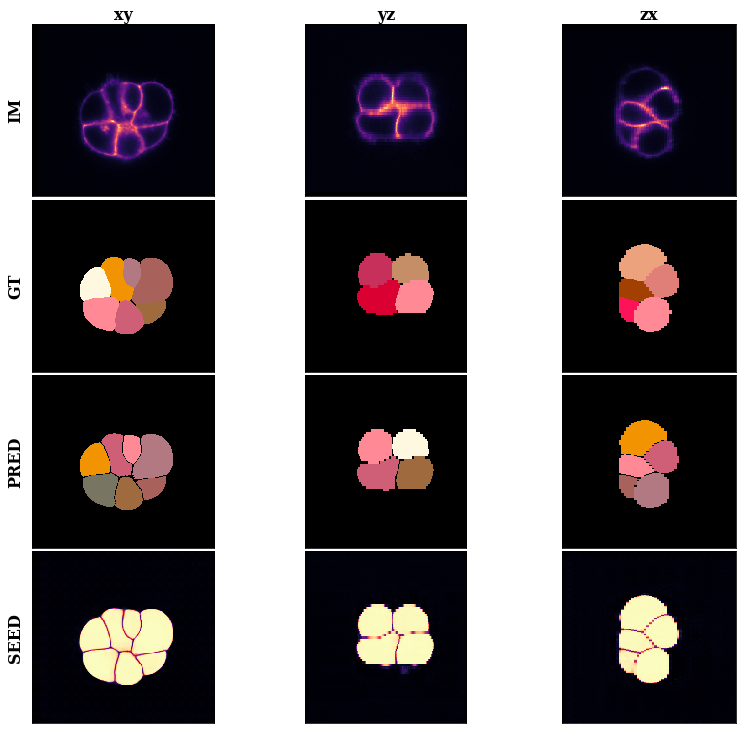

In [10]:
index = 8
print("Image filename is {} and index is {}".format(os.path.basename(image_file_names[index]), index))
if len(ground_truth_file_names) > 0:
    visualize_3d(image_file_names[index], ground_truth_file_names[index], prediction_file_names[index], seed_file_names[index], new_cmp, anisotropy=pixel_size_z_microns/pixel_size_x_microns)
else:
    visualize_3d(image_file_names[index], None, prediction_file_names[index], seed_file_names[index], new_cmp, anisotropy=pixel_size_z_microns/pixel_size_x_microns)

Image filename is X070.tif and index is 2


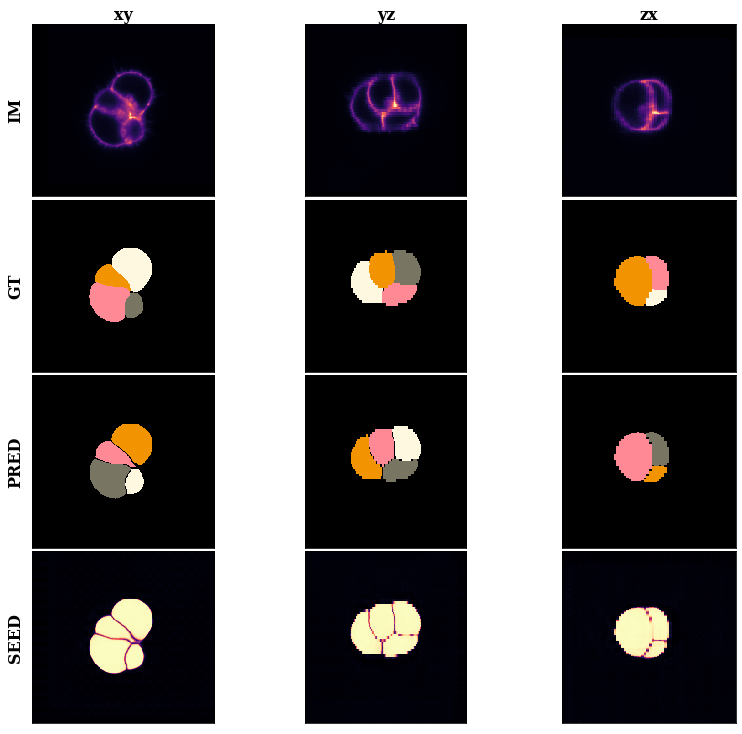

In [11]:
index = 2
print("Image filename is {} and index is {}".format(os.path.basename(image_file_names[index]), index))
if len(ground_truth_file_names) > 0:
    visualize_3d(image_file_names[index], ground_truth_file_names[index], prediction_file_names[index], seed_file_names[index], new_cmp, anisotropy=pixel_size_z_microns/pixel_size_x_microns)
else:
    visualize_3d(image_file_names[index], None, prediction_file_names[index], seed_file_names[index], new_cmp, anisotropy=pixel_size_z_microns/pixel_size_x_microns)